## Installing requirements
- This can be done by creating a requirements.txt file and installing all the libraries in one go

In [1]:
%%capture
%pip install -r requirements.txt
%pip install pydot

In [2]:
# Importing libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
from matrepr import mdisplay
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the device to CPU
# for some reason, model training is slower on GPU here
tf.config.set_visible_devices([], 'GPU')


## Simple classification with MNIST Dataset

In [3]:
epochs = 200
batch_size = 128
nb_classes = 10
n_hidden = 128
validation_split = 0.2

In [4]:
mnist = keras.datasets.mnist

In [5]:
(X_train,Y_train), (X_test, Y_test) = mnist.load_data()
f"{X_train.shape=} & {X_test.shape =} "

'X_train.shape=(60000, 28, 28) & X_test.shape =(10000, 28, 28) '

In [6]:
# Each row is a digit
X_train = X_train.reshape(60000,784)
X_train = X_train.astype('float32')

X_test = X_test.reshape(10000,784)
X_test = X_test.astype('float32')

In [7]:
# Normalize the input
# Normalization helps with the gradient descent by providing equal updates to the weight vectors
X_train = X_train/255
X_test = X_test/255

## Convert the y variables to OHE variables
## OHE for Y labels --> Really cool
Y_train = tf.keras.utils.to_categorical(Y_train, nb_classes)
Y_test = tf.keras.utils.to_categorical(Y_test, nb_classes)

(array([0]),)


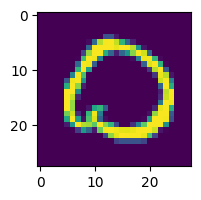

In [8]:
r = 1028
print(np.where(Y_train[r,:]==1))
plt.figure(figsize = (2,2))
plt.imshow(X_train[r,:].reshape((28,28)))


In [9]:
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential()

# Add the layers to the model
# it means that the input is a tensor of 784 -dimension
# this is the way how we write it
model.add(layers.Input(shape=(784,)))
model.add(layers.Dense(units=10, activation = 'softmax', name = 'D1'))
# Print the summary of the model
model.summary()
model.compile(loss=  'categorical_crossentropy', metrics = 'accuracy', optimizer = 'sgd')
m0 = model.fit(X_train, Y_train, epochs =50, batch_size = 128, validation_split = 0.2, verbose = True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
375/375 [==============================] - 0s 807us/step - loss: 1.3574 - accuracy: 0.6791 - val_loss: 0.8875 - val_accuracy: 0.8309
Epoch 2/50
375/375 [==============================] - 0s 600us/step - loss: 0.7890 - accuracy: 0.8284 - val_loss: 0.6548 - val_accuracy: 0.8582
Epoch 3/50
375/375 [==============================] - 0s 583us/step - loss: 0.6427 - accuracy: 0.8500 - val_loss: 0.5607 - val_accuracy: 0.8715
Epoch 4/50
375/375 [==============================] - 0s 587us/step - loss: 0.5717 - accuracy: 0.8604 - val_loss: 0.50

In [10]:
physical_devices = tf.config.list_physical_devices()
for device in physical_devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


- Epoch is one complete traversal through the data
- batch size = 128 means, at a time 128 examples of {Feature: Output} will be used to calculate the gradient. Total examples in training data = 60000 * 0.8 (accounting for validation data)/ 128 = 375
- 375 indicates number of gradient descent steps that are taken at each epoc
- The validation data in tensorflow remains same for each epoch: https://stackoverflow.com/questions/48810813/how-to-extract-train-and-validation-sets-in-keras

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
test_loss, test_acc = model.evaluate(X_test,Y_test)
print(test_acc)
print(classification_report(y_true = np.where(Y_test==1)[1], y_pred= np.argmax(model.predict(X_test), axis = 1)))

313/313 [==============================] - 0s 362us/step - loss: 0.3085 - accuracy: 0.9153
0.9153000116348267
313/313 [==============================] - 0s 286us/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.97      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.91      0.93      0.92       982
           5       0.91      0.85      0.88       892
           6       0.92      0.95      0.94       958
           7       0.93      0.91      0.92      1028
           8       0.87      0.88      0.87       974
           9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



In [12]:
# improving the model by adding one dense layer
model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 20, activation = 'relu', name = 'D1'),
        layers.Dense(units = 10, activation = 'softmax', name = 'D2')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')
%timeit
m1 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 0s 832us/step - loss: 1.5782 - accuracy: 0.5587 - val_loss: 0.9449 - val_accuracy: 0.8001
Epoch 2/50
375/375 [==============================] - 0s 640us/step - loss: 0.7495 - accuracy: 0.8242 - val_loss: 0.5721 - val_accuracy: 0.8622
Epoch 3/50
375/375 [==============================] - 0s 626us/step - loss: 0.5413 - accuracy: 0.8629 - val_loss: 0.4596 - val_accuracy: 0.8805
Epoch 4/50
375/375 [==============================] - 0s 628us/step - loss: 0.4613 - accuracy: 0.8780 - val_loss: 0.4071 - val_accuracy: 0.8908
Epoch 5/50
375/375 [==============================] - 0s 677us/step - loss: 0.4181 - accuracy: 0.8867 - val_loss: 0.3768 - val_accuracy: 0.8962
Epoch 6/50
375/375 [==============================] - 0s 658us/step - loss: 0.3906 - accuracy: 0.8928 - val_loss: 0.3560 - val_accuracy: 0.9018
Epoch 7/50
375/375 [==============================] - 0s 658us/step - loss: 0.3710 - accuracy: 0.8970 - val_loss: 0.3414 - val_accuracy:

In [13]:
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m2 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 1.7630 - accuracy: 0.4462 - val_loss: 1.1651 - val_accuracy: 0.6923
Epoch 2/50
375/375 [==============================] - 0s 728us/step - loss: 0.8855 - accuracy: 0.7616 - val_loss: 0.6691 - val_accuracy: 0.8177
Epoch 3/50
375/375 [==============================] - 0s 728us/step - loss: 0.6186 - accuracy: 0.8268 - val_loss: 0.5165 - val_accuracy: 0.8561
Epoch 4/50
375/375 [==============================] - 0s 718us/step - loss: 0.5041 - accuracy: 0.8581 - val_loss: 0.4325 - val_accuracy: 0.8781
Epoch 5/50
375/375 [==============================] - 0s 733us/step - loss: 0.4339 - accuracy: 0.8779 - val_loss: 0.3822 - val_accuracy: 0.8889
Epoch 6/50
375/375 [==============================] - 0s 747us/step - loss: 0.3908 - accuracy: 0.8898 - val_loss: 0.3491 - val_accuracy: 0.8992
Epoch 7/50
375/375 [==============================] - 0s 740us/step - loss: 0.3620 - accuracy: 0.8967 - val_loss: 0.3277 - val_accuracy: 0

### Dense layer and Dropout
- Dropout is a way to tackle overfitting similar to regularization
- The idea behind dropout is that some output nodes are randomly dropped such that they don't take part in the model training
- During <B>Training</B>, a dropout ratio is selected 'p'. p = 0 means all are dropped, p=1 means none is dropped
- During testing: The weights will be overestimated for the neurons that were kept. Therefore, the weights are multiplied by p 

https://medium.com/analytics-vidhya/understanding-dropout-abe00504be82


In [14]:
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        tf.keras.layers.Dropout(rate = 0.5, seed = 42),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m3 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 0s 908us/step - loss: 2.1045 - accuracy: 0.2194 - val_loss: 1.7188 - val_accuracy: 0.4857
Epoch 2/50
375/375 [==============================] - 0s 727us/step - loss: 1.6265 - accuracy: 0.4552 - val_loss: 1.1762 - val_accuracy: 0.7132
Epoch 3/50
375/375 [==============================] - 0s 735us/step - loss: 1.2846 - accuracy: 0.5717 - val_loss: 0.8435 - val_accuracy: 0.7820
Epoch 4/50
375/375 [==============================] - 0s 796us/step - loss: 1.0784 - accuracy: 0.6386 - val_loss: 0.6672 - val_accuracy: 0.8356
Epoch 5/50
375/375 [==============================] - 0s 734us/step - loss: 0.9542 - accuracy: 0.6827 - val_loss: 0.5736 - val_accuracy: 0.8635
Epoch 6/50
375/375 [==============================] - 0s 713us/step - loss: 0.8797 - accuracy: 0.7133 - val_loss: 0.5034 - val_accuracy: 0.8765
Epoch 7/50
375/375 [==============================] - 0s 691us/step - loss: 0.8200 - accuracy: 0.7349 - val_loss: 0.4593 - val_accuracy:

In [15]:
# Effect of optimization algorithms on the training process
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'Adam', loss =  'categorical_crossentropy', metrics = 'accuracy')

m4 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

# Effect of optimization algorithms on the training process
## Add one more dense layer

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'RMSprop', loss =  'categorical_crossentropy', metrics = 'accuracy')

m5 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 1s 1ms/step - loss: 0.6175 - accuracy: 0.8206 - val_loss: 0.2629 - val_accuracy: 0.9273
Epoch 2/50
375/375 [==============================] - 0s 856us/step - loss: 0.2449 - accuracy: 0.9304 - val_loss: 0.2051 - val_accuracy: 0.9426
Epoch 3/50
375/375 [==============================] - 0s 835us/step - loss: 0.1961 - accuracy: 0.9429 - val_loss: 0.1838 - val_accuracy: 0.9472
Epoch 4/50
375/375 [==============================] - 0s 855us/step - loss: 0.1672 - accuracy: 0.9515 - val_loss: 0.1633 - val_accuracy: 0.9544
Epoch 5/50
375/375 [==============================] - 0s 840us/step - loss: 0.1465 - accuracy: 0.9575 - val_loss: 0.1547 - val_accuracy: 0.9561
Epoch 6/50
375/375 [==============================] - 0s 834us/step - loss: 0.1311 - accuracy: 0.9621 - val_loss: 0.1454 - val_accuracy: 0.9593
Epoch 7/50
375/375 [==============================] - 0s 865us/step - loss: 0.1169 - accuracy: 0.9668 - val_loss: 0.1352 - val_accuracy: 0

### Regularization

This is used to combat the overfitting problem. It helps in two ways:
- Choosing a simple model means easier to train (less computationally demanding)
- Better generalization power

Model is nothing but a vector of weights. Complexity can be controlled by setting some weights to either zero or very close to zero.

The objective function of training is : $Obj\space = min(Loss_{training} | Model)$


To incorporate the regularizartion, this is modified to :
$Obj\space = min(Loss_{training} | Model) \space + \lambda* Complexity_{model}$

Here $\lambda $ can be used as a hyperparameter to indicate how much we want to weigh in complexity in the objective function


Types of regularizers: https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t

- There are three type of regularizers in Keras:
    You have the regression equation 𝑦=𝑊𝑥+𝑏, where 𝑥 is the input, 𝑊 the weights matrix and 𝑏 the bias.

    - Kernel Regularizer: Tries to reduce the weights 𝑊 (excluding bias).
    - Bias Regularizer: Tries to reduce the bias 𝑏.
    - Activity Regularizer: Tries to reduce the layer's output 𝑦, thus will reduce the weights and adjust bias so 𝑊𝑥+𝑏 is smallest.

- The concept of Batch Normalization (https://www.youtube.com/watch?v=1XMjfhEFbFA)
 - Consider a deep neural network. In a DNN, we typically use a version of mini-match algorithm to train. This means that we use a batch-size to train our models
 - What would happen if distribution of inputs change with each batch?
    - This is bad because we will have to keep on constantly adjust to the new distribution
        - Solution: What if we make the data gaussian at the input of each layer?
        - For a mini batch, for input to each layer, apply a normalization function to transform it to 0 mean 1 variance: $ \hat{S}_i = (S_i - E[S_i])/\sqrt{var(S_i)}$ 
        - What if this is not right? How to account for that?
        - Provide the freedom to the network to adjust back, if required  i.e. learn the output as  - $y_k   = \gamma_k * \hat{S_{ik}} + \beta_k$ where $y_k$ is the output of the kth layer ; $\gamma_k , \beta_k$ are learnable parameters. Meaning, for each layer we will have 2 set of parameters that will be learnt and 2 set of parameters that will not be learnt (mean and variance to apply to the input)

In [16]:
from keras.regularizers import l1,l2

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        layers.Dense(units = 32, activation = 'relu', name = 'D1', kernel_regularizer = l2(0.01), activity_regularizer = l2(0.01), bias_regularizer = l1(0.01)),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),

        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')

m6 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)



Epoch 1/50
375/375 [==============================] - 0s 898us/step - loss: 2.4821 - accuracy: 0.3978 - val_loss: 1.9772 - val_accuracy: 0.6901
Epoch 2/50
375/375 [==============================] - 0s 709us/step - loss: 1.6798 - accuracy: 0.7624 - val_loss: 1.4095 - val_accuracy: 0.8267
Epoch 3/50
375/375 [==============================] - 0s 704us/step - loss: 1.3036 - accuracy: 0.8364 - val_loss: 1.1549 - val_accuracy: 0.8673
Epoch 4/50
375/375 [==============================] - 0s 719us/step - loss: 1.0997 - accuracy: 0.8675 - val_loss: 0.9930 - val_accuracy: 0.8870
Epoch 5/50
375/375 [==============================] - 0s 705us/step - loss: 0.9602 - accuracy: 0.8844 - val_loss: 0.8780 - val_accuracy: 0.8955
Epoch 6/50
375/375 [==============================] - 0s 705us/step - loss: 0.8561 - accuracy: 0.8939 - val_loss: 0.7887 - val_accuracy: 0.9049
Epoch 7/50
375/375 [==============================] - 0s 704us/step - loss: 0.7739 - accuracy: 0.9027 - val_loss: 0.7178 - val_accuracy:

In [17]:
from tensorflow.keras.layers import BatchNormalization

model = tf.keras.Sequential(
    [
        layers.Input(shape = (784,)),
        
        layers.Dense(units = 32, activation = 'relu', name = 'D1'),
        BatchNormalization(),
        layers.Dense(units = 16, activation = 'relu', name = 'D2'),
        BatchNormalization(),
        layers.Dense(units = 10, activation = 'softmax', name = 'D3')
    ]
    )
model.compile(optimizer = 'SGD', loss =  'categorical_crossentropy', metrics = 'accuracy')
print(model.summary())
# m7 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 D2 (Dense)                  (None, 16)                528       
                                                                 
 batch_normalization_1 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 D3 (Dense)                  (None, 10)                170       
                                                                 
Total params: 26010 (101.60 KB)
Trainable params: 2591

In the above code, the batchnormalization layer has output shape same as the output shape of the layer on which it is applied. It has 4* number of units as parameters. 
 - 2 * num of units are trainable parameters: These are the $\gamma$ and $\beta$ we mentioned above
 - 2* num of units are the moving average means and variance that are recorded and stored for each unit in a layer to use at inference time 

In [18]:
m7 = model.fit(X_train, Y_train, validation_split = 0.2, batch_size = 128, epochs = 50)

Epoch 1/50
375/375 [==============================] - 1s 978us/step - loss: 1.0821 - accuracy: 0.6931 - val_loss: 0.7050 - val_accuracy: 0.8506
Epoch 2/50
375/375 [==============================] - 0s 749us/step - loss: 0.5541 - accuracy: 0.8706 - val_loss: 0.4210 - val_accuracy: 0.8968
Epoch 3/50
375/375 [==============================] - 0s 753us/step - loss: 0.3990 - accuracy: 0.9008 - val_loss: 0.3328 - val_accuracy: 0.9149
Epoch 4/50
375/375 [==============================] - 0s 754us/step - loss: 0.3275 - accuracy: 0.9145 - val_loss: 0.2796 - val_accuracy: 0.9255
Epoch 5/50
375/375 [==============================] - 0s 746us/step - loss: 0.2818 - accuracy: 0.9247 - val_loss: 0.2470 - val_accuracy: 0.9321
Epoch 6/50
375/375 [==============================] - 0s 749us/step - loss: 0.2511 - accuracy: 0.9314 - val_loss: 0.2228 - val_accuracy: 0.9393
Epoch 7/50
375/375 [==============================] - 0s 750us/step - loss: 0.2278 - accuracy: 0.9366 - val_loss: 0.2082 - val_accuracy:

<Figure size 20000x500 with 0 Axes>

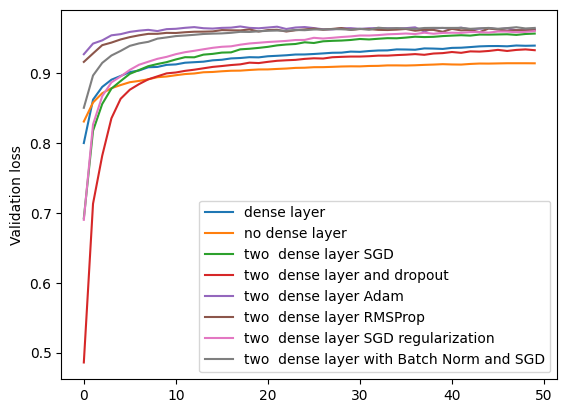

In [19]:
plt.figure(figsize = (200,5))
fig, ax = plt.subplots()
ax.plot(m1.history['val_accuracy'], label = 'dense layer')
ax.plot(m0.history['val_accuracy'], label  = 'no dense layer')
ax.plot(m2.history['val_accuracy'], label  = 'two  dense layer SGD')
ax.plot(m3.history['val_accuracy'], label  = 'two  dense layer and dropout')
ax.plot(m4.history['val_accuracy'], label  = 'two  dense layer Adam')
ax.plot(m5.history['val_accuracy'], label  = 'two  dense layer RMSProp')
ax.plot(m6.history['val_accuracy'], label  = 'two  dense layer SGD regularization')
ax.plot(m7.history['val_accuracy'], label  = 'two  dense layer with Batch Norm and SGD')

ax.set_ylabel('Validation loss')
plt.legend()

## Sentiment Analysis

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from typing import List

In [4]:
(X_train,Y_train), (X_test, Y_test) = keras.datasets.imdb.load_data(num_words = 10_000)

In [5]:
print(f"{X_train.shape=  } , {X_test.shape = }"  )

# This is how each record in the X_train looks like
# each word is represented by the word frequency. Meaning the second word in the ```X_train[0]``` is 14th most frequent word in the corpus
X_train[0][0:5]


X_train.shape=  (25000,) , X_test.shape = (25000,)


[1, 14, 22, 16, 43]

In [6]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1 # This character is used to symbolize that here will the review start from 
oov_char = 2 # This indicates whether a character is absent from the vocabulary
index_from = 3
# Retrieve the training sequences.
(x_train, _), _ = keras.datasets.imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
# since we have designated the index 1 and 2 to start and OOV
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
def decode(inp: list):    
    decoded_sequence = " ".join(inverted_word_index[i] for i in inp)
    return decoded_sequence


In [7]:
for i in [2,5,7]:
    print(decode(X_train[i]), "\n")

[START] this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had [OOV] working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how [OOV] this is to watch save yourself an hour a bit of your life 

[START] begins better than it ends funny that the russian submarine crew [OOV] all other actors it's like those scenes where documentary shots br br spoiler part the message [OOV] was contrary to the whole story it just does not [OOV] br br 

[START] the [OOV] tells the story of the four hamilton

In [8]:
# Input will be fed into a neural network and the lengths of the input should be same.
print(f"len of first 5 comments {[len(x) for x in X_train][0:5]}\n")

# padding is done using the tf.keras.preprocessing --> It is similar to sklearn preprocessing stuff
X_train_padded = keras.preprocessing.sequence.pad_sequences(sequences = X_train,maxlen=200)
X_test_padded  = keras.preprocessing.sequence.pad_sequences(sequences = X_test,maxlen=200)

# lets understand the padding
# for one where len > max_len
# in such cases first n-maxlen elements are chipped off of the array
assert np.all(np.equal(np.array(X_train_padded[0,:]), np.array(X_train[0][len(X_train[0])- 200:])))
# for one where len < max_len
# They are padded with zeros in the beginning
assert np.all(X_train[1] == X_train_padded[1,200-len((X_train[1])):])

len of first 5 comments [218, 189, 141, 550, 147]



### Understand the concept of embedding layer
 - Embedding layer is similar to a lookup table. 
 - The embeddings are learnt in the process of accomplishing a task

In [12]:
from keras.layers import Embedding
from keras import layers
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        layers.Input(shape = (2,)),
        # input_dim = number of terms to be embedded | Output_dim = dimension of embedding | input_length = number of terms in the input to the layer
        Embedding(input_dim=10, output_dim=5, input_length=100)
    ]
)
model.summary()
model.compile(loss = 'mse', optimizer = 'sgd')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 5)              50        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# input data is a 2 dimensional numpy array
input_data = np.array([[1,2]])
# Lets get the embeddings
mdisplay(model.layers[0].get_weights()[0], title = 'Embedding weights')
# lets predict the data for the input --> Its simply a
model.predict(input_data)[0]

,0,1,2,3,4
0,0.03581891,0.016262855,-0.014128923,0.044998955,-0.04219389
1,0.01523323,0.047049988,-0.033208787,0.0023789294,0.013075959
2,-0.041358173,-0.0053642504,0.04660337,-0.0029658899,0.00029463693
3,0.026566599,-0.048117008,-0.03076191,0.0014241561,-0.04335753
4,-0.0462355,0.03479666,0.041542795,-0.023745919,0.03595319
5,-0.037252545,-0.0037714615,0.0062721856,0.006669186,-0.029983794
6,-0.02903073,0.04891639,-0.039010704,-0.00563867,-0.023491144
7,-0.037897874,0.0233143,-0.031765938,0.018129576,0.015041899
8,-0.04573692,0.006363582,-0.016587831,-0.011315323,0.045452144
9,-0.0089605935,0.0031470172,-0.024468029,-0.037718285,0.021582995


1/1 [==============================] - 0s 31ms/step


array([[ 0.01523323,  0.04704999, -0.03320879,  0.00237893,  0.01307596],
       [-0.04135817, -0.00536425,  0.04660337, -0.00296589,  0.00029464]],
      dtype=float32)

### Understand the concept of global max pooling layer
- global max pooling is a way to summarize the embedded input.

- $\vec{o} = Itemwise (Max(\vec{I_1},\vec{I_2},\vec{I_3}......\vec{I_n}))$


In [14]:
from keras.layers import Embedding
from keras.layers import GlobalMaxPooling1D
keras.utils.set_random_seed(42)
model = keras.Sequential(
    [
        layers.Input(shape = (2,)),
        # input_dim = number of terms to be embedded | Output_dim = dimension of embedding | input_length = number of terms in the input to the layer
        Embedding(input_dim=10, output_dim=5, input_length=2, name = 'E1'),
        GlobalMaxPooling1D()
        
    ]
)
model.summary()
model.compile(loss = 'mse', optimizer = 'sgd')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 E1 (Embedding)              (None, 2, 5)              50        
                                                                 
 global_max_pooling1d (Glob  (None, 5)                 0         
 alMaxPooling1D)                                                 
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# element wise max of the arrays
assert np.all(np.max(model.layers[0].get_weights()[0][[1,2],:], axis = 0) == model.predict(np.array([[1,2]])))

1/1 [==============================] - 0s 18ms/step


### Back to IMDB

In [30]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X_train_padded,Y_train, train_size=0.8, random_state=42)

In [31]:
from keras import layers
# Each row is a review 
# create the model
model = tf.keras.Sequential(
    [
        layers.Input(shape = (200,)),
        layers.Embedding(input_dim = 10000,output_dim = 10,input_length = 200),
        layers.GlobalAvgPool1D(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')   
    ]
)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
sa_1 = model.fit(train_x, train_y, epochs = 50, batch_size = 256, validation_data=(val_x, val_y), verbose = False)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 10)           100000    
                                                                 
 global_average_pooling1d (  (None, 10)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 101537 (396.63 KB)
Trainable params: 101537 (396.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Above model has a clear case of overfitting. Lets improve it
from keras import layers
# Each row is a review 
print(f"{X_train_padded.shape = }")
# create the model
model = tf.keras.Sequential(
    [
        layers.Input(shape = (200,)),
        layers.Embedding(input_dim = 10000,output_dim = 10,input_length = 200),
        layers.GlobalAvgPool1D(),
        layers.Dense(128, activation='relu', activity_regularizer=l1(0.05), bias_regularizer=l1(0.05)),
        layers.Dense(1, activation='sigmoid')   
    ]
)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
sa_2 =model.fit(train_x, train_y, epochs = 50, batch_size = 256, validation_data=(val_x, val_y), verbose = False)

X_train_padded.shape = (25000, 200)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 10)           100000    
                                                                 
 global_average_pooling1d_1  (None, 10)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 128)               1408      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 101537 (396.63 KB)
Trainable params: 101537 (396.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Above model has a clear case of overfitting. Lets improve it by changing the embedding dimension

from keras import layers
# Each row is a review 
print(f"{X_train_padded.shape = }")
# create the model
model = tf.keras.Sequential(
    [
        layers.Input(shape = (200,)),
        layers.Embedding(input_dim = 10000,output_dim = 2,input_length = 200),
        layers.GlobalAvgPool1D(),
        
        layers.Dense(128, activation='relu'),
        
        layers.Dense(1, activation='sigmoid')   
    ]
)
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
sa_3 = model.fit(train_x, train_y, epochs = 50, batch_size = 256, validation_data=(val_x, val_y), verbose = False)

X_train_padded.shape = (25000, 200)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 2)            20000     
                                                                 
 global_average_pooling1d_2  (None, 2)                 0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 20513 (80.13 KB)
Trainable params: 20513 (80.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# The main takeaway is that the embedding layer is probably the culprit where as I reduce the dimension of embedding, the validation accuracy goes up
# Lets train a non-embedding layer model
model = tf.keras.Sequential(
    [
        layers.Input(shape = (200,)),
        layers.Dense(128, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ]
)
model.summary()
model.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
sa_4 = model.fit(train_x, train_y, epochs = 50, batch_size = 256, validation_data=(val_x, val_y), verbose = False)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               25728     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 38209 (149.25 KB)
Trainable params: 38209 (149.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

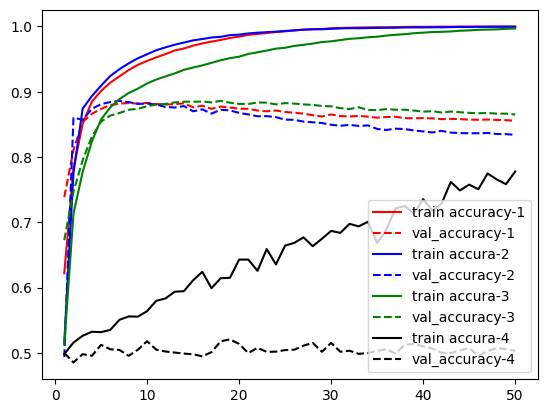

In [35]:
sn.lineplot(y= sa_1.history['accuracy'], x = range(1,51,1), label = 'train accuracy-1', color = 'red')
sn.lineplot(y= sa_1.history['val_accuracy'], x = range(1,51,1), label = 'val_accuracy-1', color = 'red', linestyle = 'dashed')

sn.lineplot(y= sa_2.history['accuracy'], x = range(1,51,1), label = 'train accura-2', color = 'blue')
sn.lineplot(y= sa_2.history['val_accuracy'], x = range(1,51,1), label = 'val_accuracy-2', color = 'blue', linestyle = 'dashed')

sn.lineplot(y= sa_3.history['accuracy'], x = range(1,51,1), label = 'train accura-3', color = 'green')
sn.lineplot(y= sa_3.history['val_accuracy'], x = range(1,51,1), label = 'val_accuracy-3', color = 'green', linestyle = 'dashed')

sn.lineplot(y= sa_4.history['accuracy'], x = range(1,51,1), label = 'train accura-4', color = 'black')
sn.lineplot(y= sa_4.history['val_accuracy'], x = range(1,51,1), label = 'val_accuracy-4', color = 'black', linestyle = 'dashed')

## Gradient descent for regression

In [36]:
# Generate data
np.random.seed(42)
data = np.random.normal(0,1,size = 300).reshape((100,3))
train_x = data[:,0:2]
train_y = data[:,-1]

In [37]:
from keras.optimizers.legacy import Adam
adam_instance= Adam(learning_rate=0.009)

model  = tf.keras.Sequential(
    [
        layers.Input(shape = (2,)),
        layers.Dense(units = 1, activation = 'linear')
    ]
)
model.summary()
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
m1 = model.fit(train_x, train_y, epochs = 1500, batch_size = 128, verbose = False)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(train_x, train_y)
LR.coef_,LR.intercept_

(array([-0.17139918, -0.1477007 ]), 0.06348658358477695)

In [39]:
# Initialize the weights
np.random.seed(42)
rate = 0.0005

# initialize weights
def initialize_weight(size):
    np.random.seed(42)
    return np.random.normal(size = size).reshape(1,size)
def get_error(weights):
    return train_y.reshape(100,1) - (np.column_stack((train_x,np.ones(len(train_x)))))@(weights.T)

def update_weights(error):
    delta_w = ((np.column_stack((train_x,np.ones(len(train_x))))).T)@error    
    delta_w = (-2/len(train_x))*delta_w
    return delta_w.T

In [40]:
rate = 0.005
w_init = initialize_weight(3)

for i in range(5000):
    e = get_error(w_init)
    delta_w = update_weights(e)*rate
    w_init = w_init - delta_w
w_init

array([[-0.17139918, -0.1477007 ,  0.06348658]])

In [41]:
# lets compare the three coefficients that we just calculated
nn_weights = []
for a in model.layers[0].get_weights():
    for x in a:
        nn_weights.append(float(x))
print(f"{nn_weights=}")
print(f"LR weights  = {LR.coef_}, {LR.intercept_}")

print(f"Numpy gradient descent {w_init = }")

nn_weights=[-0.17139972746372223, -0.14770102500915527, 0.0634867325425148]
LR weights  = [-0.17139918 -0.1477007 ], 0.06348658358477695
Numpy gradient descent w_init = array([[-0.17139918, -0.1477007 ,  0.06348658]])


## Word embeddings

- Background
    - It all started with One hot encoding. OHE is very naive technique as it does not capture semantic relationship in the data
    - After this, vectorization using document as a context came into use. These include techniques as TF-IDF
    - Word embeddings use neighboring words as context. 
        - The main idea behind word embeddings is 'Distributional Hypothesis': Words that occur together in similar context tend to be similar to each other.
        - Famous quote: "You shall know a word by the company it keeps"

- Word Embeddings or distributed representation
    - Word2Vec (Continuous bag of words & Skip-gram)   <Link>https://github.com/lihasarora/DeepLearning-NPTEL/blob/new/Embeddings_230925_192837.pdf</Link>
    - Glove : "Global Vectors for word representations". They are built via unsupervised learning techniques. This is different from the Word2Vec which is a supervised learning technique
        - Step 1: Create a word X Context conunt matrix 
        - Step 2: Perform the SVD to decompose the matrix from Step 1 into two matrices 
    
    <B> The Glove is much more resource intensive than WordtoVec. This is because the entire matrix has to kept in memory to perform factorization.

### Create embeddings using Gensim
     Gensim has an excellent implementation of Word2Vec

In [3]:
import gensim.downloader as api
from gensim.models import Word2Vec

- This trains a custom model on the text8 dataset -->
- Parameters used: CBOW model, window size = 5
- embedding dimension = 100

In [4]:
%%capture
dataset = api.load('text8')
# very simple api call to create word2vec model
model = Word2Vec(dataset)
model.save(r"/Users/sahila/Documents/Sahil_Work/Deep Learning/text8-word2vec.bin")

In [5]:
# KeyedVectors is a datastructure that is a mapping between key and vectors
# The keys in this case is a word. However, it can even be a node or a document

from gensim.models import KeyedVectors
model = KeyedVectors.load(r"/Users/sahila/Documents/Sahil_Work/Deep Learning/text8-word2vec.bin")
word_vectors = model.wv

In [6]:
# Lets take a word  - Say 'King'
words = word_vectors.key_to_index.keys()
assert "king" in words

Get the most similar words to word <B> King </B>

In [7]:
def get_top_n_similar(w, n= 5):
    for i,(word, similarity) in enumerate(word_vectors.most_similar(w)):
        if i <n:
            print(f"{word = }, {similarity = :0.2f}") 
        else:
            pass

In [8]:
get_top_n_similar('king')

word = 'prince', similarity = 0.76
word = 'emperor', similarity = 0.72
word = 'throne', similarity = 0.71
word = 'queen', similarity = 0.71
word = 'kings', similarity = 0.69


In [9]:
get_top_n_similar('engineer')

word = 'inventor', similarity = 0.77
word = 'architect', similarity = 0.72
word = 'technician', similarity = 0.71
word = 'scientist', similarity = 0.70
word = 'industrialist', similarity = 0.69


get the vectors contributing to the words

In [10]:
print(word_vectors.most_similar(positive = ['king','woman'], negative = ['man']),'\n')
print(word_vectors.most_similar_cosmul(positive = ['king','woman'], negative = ['man']))

# cosmul refers to the cosine similarity calculated on a log scale.  It is a better measure of similarity as it amplifies the distance between small scores and reduces the distance between large scores

[('queen', 0.6670719981193542), ('empress', 0.6559230089187622), ('prince', 0.6478533148765564), ('emperor', 0.6242853403091431), ('elizabeth', 0.6207744479179382), ('throne', 0.6081936955451965), ('princess', 0.6039698123931885), ('aragon', 0.6007658243179321), ('isabella', 0.5976263284683228), ('daughter', 0.5918189883232117)] 

[('empress', 0.9246813058853149), ('queen', 0.919299304485321), ('prince', 0.8982629776000977), ('elizabeth', 0.898007333278656), ('emperor', 0.8882798552513123), ('isabella', 0.8811533451080322), ('princess', 0.876758337020874), ('aragon', 0.875553548336029), ('throne', 0.8730996251106262), ('regent', 0.8698657155036926)]


## Spam Classification using word embeddings
 - We will create our own embedding 
 - We will use a third party embedding
 - We will provide model with 3rd party embedding to start the training (Transfer Learning)

In [11]:
# Get the data
def download_data(url):
    tf.keras.utils.get_file(url.split('/')[-1], url, extract=True, cache_dir=".")
    # extract = True is important because the file format is zip
    # cache_dir = where to store the data. The function automatically creates a 'datasets/' folder and store there 
    labels, texts = [],[]
    with open("datasets/SMSSpamCollection", "r") as f:
        for line in f:
            label,text = line.split('\t')
            labels.append(1 if label == 'spam' else 0)
            texts.append(text)
    return labels, texts

In [12]:
labels, texts = download_data(r"https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip")

In [13]:
## Preprocessing
def preprocess_data(input_text):
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    # during the fit_on_text method, the tokenizer builds vocabulary
    tokenizer.fit_on_texts(texts)
    # during the texts_to_sequences method, tokenizer convers text to sequences based on the vocabulary it learnt above
    text_sequences = tokenizer.texts_to_sequences(texts)
    # padding to make sure the length of the review is same
    max_seqlen = np.quantile([len(text_sequences[x]) for x in range(len(text_sequences))], 0.95).astype('int')
    padded_seq = tf.keras.preprocessing.sequence.pad_sequences(text_sequences,maxlen = max_seqlen)
    return tokenizer, text_sequences, padded_seq

cat_labels = tf.keras.utils.to_categorical(labels, num_classes = 2)

In [14]:
tokenizer, text_sequences, padded_seq = preprocess_data(texts)
# Get the vocabulary of the tokenizer
word2idx = tokenizer.word_index
# since padding adds 0, we will manually add pad to the mapping
word2idx['PAD'] = 0
idx2word = tokenizer.index_word
idx2word[0] = 'PAD'


# Lets reconstruct a review using the tokenized array
def reconstruct_using_padded_sequence(idx):
    print(' '.join([idx2word[x]  for x in padded_seq[idx]]))
    print(texts[idx])
    return None

reconstruct_using_padded_sequence(1029)

PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD lol you forgot it eh yes i'll bring it in babe
Lol you forgot it eh ? Yes, I'll bring it in babe



In [15]:
def get_first_n_elements_tf_ds(tf_df,n, return_ = False):
    i = 0
    for element in tf_df:
        if i<n:
            if return_ == False:
                print(element)
            else:
                return element
            i = i+1
        else:
            break
    return None

In [16]:
# Create  Tensorflow dataset: 
num_records = len(texts)
# tensorflow dataset is optimized for parallel processing using tensorflow
# the 'from_tensor_slices' is equivalent to using zip() function where two tensors are stitched together
dataset = tf.data.Dataset.from_tensor_slices((padded_seq,cat_labels))
# Lets look at the first element of this dataset created. 
# We can see that each element is just a tuple with 2 parts inside
get_first_n_elements_tf_ds(dataset,1)
dataset = dataset.shuffle(10_000)
test_size = num_records//4
val_size = (num_records- test_size)//10

test_dataset = dataset.take(test_size)
val_dataset  = dataset.skip(test_size).take(val_size)
train_dataset = dataset.skip(val_size+ test_size)

batch_size = 128
test_dataset = test_dataset.batch(batch_size, drop_remainder=True)
val_dataset = val_dataset.batch(batch_size, drop_remainder=True)
train_dataset = train_dataset.batch(batch_size, drop_remainder=True)

(<tf.Tensor: shape=(33,), dtype=int32, numpy=
array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,   49,  471, 4435,  842,  755,  658,   64,    8, 1327,
         88,  123,  351, 1328,  148, 2996, 1329,   67,   58, 4436,  144],
      dtype=int32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 0.], dtype=float32)>)


In [17]:
# after batching, one can see that the first elemebt is not just one record it is rather a group of 128 records which wil go into the 
# model trianing together to update the graadient 
element = get_first_n_elements_tf_ds(train_dataset,1, return_  = True)
element[0].shape, element[1].shape

(TensorShape([128, 33]), TensorShape([128, 2]))

Building the embedding Matrix

In [18]:
# we will download a model from gensim to start off.
import gensim.downloader as api
import os

In [19]:
Embedding_model = 'glove-wiki-gigaword-300'
def build_embedding_matrix(embedding_dim,word2idx, 
                           embedding_file = '/Users/sahila/Documents/Sahil_Work/Deep Learning/E.npy'):
    """
    Creates an embedding for the existing tokens based on the gensim model

    Args:
        embedding_dim (int): length of the embedding
        word2idx (dict): mapping from word to index
        embedding_file (str, optional): saves the embedding file Defaults to '/Users/sahila/Documents/Sahil_Work/Deep Learning/E.npy'.

    Returns:
        np.array: embedding for the tokens
    """
    global Embedding_model
    
    if os.path.exists(embedding_file):
        # numpy can also load files :woah
        E = np.load(embedding_file)
    else:
        word_vectors = api.load(Embedding_model)
        E = np.zeros((len(word2idx.keys()),embedding_dim))
        j =0
        for word, index in word2idx.items():
            try:
                emb = word_vectors.get_vector(word)
                E[index,:] = emb
            except :
                j=j+1
                pass
        print(f"{j} words were not found out of total {len(word2idx)} words")
        np.save(embedding_file, E)
    return E

In [20]:
E = build_embedding_matrix(300,word2idx)

* Defining the Classifier

    - We will have 3 modes:

        - Scratch: Create embeddings from scratch
        - Vectorizer : Use the glove embedding we created above and set trainable = False
        - finetuning: Initialize with glove embedding and set trainable = True to finetune the model


In [21]:
# we are going to build it off of the keras model class. 
# First, these are the layers we are going to stitch together
tf.random.set_seed(45)
model = tf.keras.Sequential(
    
    [   tf.keras.layers.Input(shape=  (33,)),
        tf.keras.layers.Embedding(len(word2idx),300, input_length = len(padded_seq[0])),
        tf.keras.layers.Conv1D(filters=10, kernel_size = 3),
        # Difference between vanilla dropout vs spatialdropout1D
        # dropout removes one neuron at a time randomly. SpatialDroput1D randomly drops an entire filter. This is 
        tf.keras.layers.SpatialDropout1D(0.2),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(units = 20, activation='softmax'),
        tf.keras.layers.Dense(units = 2, activation='softmax')
        
    ]
)
model.compile(optimizer = "rmsprop",loss = "categorical_crossentropy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 300)           2703000   
                                                                 
 conv1d (Conv1D)             (None, 31, 10)            9010      
                                                                 
 spatial_dropout1d (Spatial  (None, 31, 10)            0         
 Dropout1D)                                                      
                                                                 
 global_average_pooling1d (  (None, 10)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 2)                 4

In [22]:
# Building a class from tf.keras.Model
class SpamCalssifierModel(tf.keras.Model):
    # kwargs: Key word arguments. 
    # constructor
    def __init__(self, vocab_sz, embed_sz, run_mode, input_length,embedding_weights,num_filters, kernel_sz,output_sz,**kwargs):
        # we want to call the constructor of the superclass of SpamClassifierModel i.e. tf.keras.Model to initialize the 
        super(SpamCalssifierModel,self).__init__(**kwargs)
        if run_mode == 'scratch':
            self.embedding = tf.keras.layers.Embedding(vocab_sz, embed_sz,
                                                       input_length=input_length,trainable = True)
        elif run_mode == "vectorizer":
            self.embedding = tf.keras.layers.Embedding(vocab_sz, embed_sz,
                                                       input_length=input_length,trainable = False, weights = [embedding_weights])  
            # self.embedding.set_weights(embedding_weights)
        
        elif run_mode == "finetuning":
            self.embedding = tf.keras.layers.Embedding(vocab_sz, embed_sz,
                                                       input_length=input_length,trainable = True, weights = [embedding_weights])  
            # initialize with the weights
            
        self.conv = tf.keras.layers.Conv1D(filters=num_filters, kernel_size=kernel_sz,activation="relu")
        self.dropout = tf.keras.layers.SpatialDropout1D(0.2)
        self.pool = tf.keras.layers.GlobalMaxPooling1D()
        self.dense2 = tf.keras.layers.Dense(output_sz,activation="softmax")
    
    # This is a method that defines the forward pass of the model. This is the method that is called when an input is passed to the model
    # This defines how input data should be processed as it passes through the model layers
    def call(self,input):
        x = self.embedding(input)
        x = self.conv(x)
        x = self.dropout(x)
        x = self.pool(x)
        x = self.dense2(x)
        return x

In [23]:
model1 = SpamCalssifierModel(
    vocab_sz= len(word2idx),
    embed_sz= 300,
    run_mode= 'scratch',
    input_length=33,
    embedding_weights= E,
    num_filters= 1024,
    kernel_sz= 5,
    output_sz=2
    )

# The input shape of the model is variable. Meaning, it will be determined based on what input we supply to it.
# Build method is executed the first time a forward pass happens
# Otherwise, explicitly calling build method ensures that the model is set up properly 
# The input is easily flowing through the network

model1.build(input_shape = (None,33))
model1.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
model1.summary()

# output shape  = Multiple measn that the model can handle multiple shapes depending on the input to the model.
model1.fit(train_dataset, epochs =3, validation_data=val_dataset, class_weight={0:1, 1:8})


Model: "spam_calssifier_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     multiple                  2703000   
                                                                 
 conv1d_1 (Conv1D)           multiple                  1537024   
                                                                 
 spatial_dropout1d_1 (Spati  multiple                  0         
 alDropout1D)                                                    
                                                                 
 global_max_pooling1d (Glob  multiple                  0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             multiple                  2050      
                                                                 
Total params: 4242074 (16.18 MB)
Trainable pa

In [24]:
model2 = SpamCalssifierModel(
    vocab_sz= len(word2idx),
    embed_sz= 300,
    run_mode= 'vectorizer',
    input_length=33,
    embedding_weights= E,
    num_filters= 1024,
    kernel_sz= 5,
    output_sz=2
    )
model2.build(input_shape = (None,33))
model2.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
model2.summary()
model2.fit(train_dataset, epochs =3, validation_data=val_dataset, class_weight={0:1, 1:8})

Model: "spam_calssifier_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     multiple                  2703000   
                                                                 
 conv1d_2 (Conv1D)           multiple                  1537024   
                                                                 
 spatial_dropout1d_2 (Spati  multiple                  0         
 alDropout1D)                                                    
                                                                 
 global_max_pooling1d_1 (Gl  multiple                  0         
 obalMaxPooling1D)                                               
                                                                 
 dense_3 (Dense)             multiple                  2050      
                                                                 
Total params: 4242074 (16.18 MB)
Trainable 

In [25]:
model3 = SpamCalssifierModel(
    vocab_sz= len(word2idx),
    embed_sz= 300,
    run_mode= 'finetuning',
    input_length=33,
    embedding_weights= E,
    num_filters= 1024,
    kernel_sz= 5,
    output_sz=2
    )
model3.build(input_shape = (None,33))
model3.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ['accuracy'])
model3.summary()

model3.fit(train_dataset, epochs =3, validation_data=val_dataset, class_weight={0:1, 1:8})

Model: "spam_calssifier_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     multiple                  2703000   
                                                                 
 conv1d_3 (Conv1D)           multiple                  1537024   
                                                                 
 spatial_dropout1d_3 (Spati  multiple                  0         
 alDropout1D)                                                    
                                                                 
 global_max_pooling1d_2 (Gl  multiple                  0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             multiple                  2050      
                                                                 
Total params: 4242074 (16.18 MB)
Trainable 

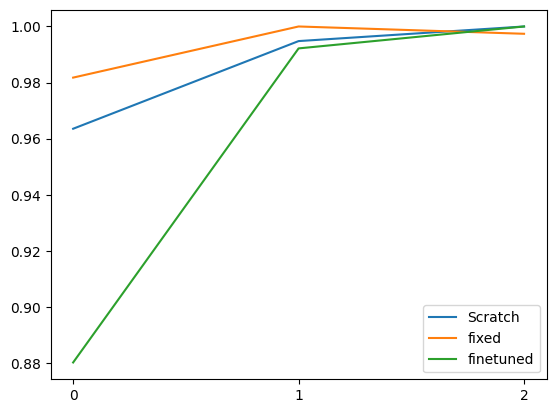

In [26]:

sn.lineplot(model1.history.history['val_accuracy'], label = 'Scratch')
sn.lineplot(model2.history.history['val_accuracy'], label = 'fixed')
sn.lineplot(model3.history.history['val_accuracy'], label = 'finetuned')
plt.xticks([0,1,2])
plt.show()


In [27]:
predictions = np.array([])
truelabels = np.array([])
i = 1
for model_id in [model1, model2, model3]:
    for Xtest, Ytest in test_dataset:
        Ypredprob = model_id.predict_on_batch(Xtest)
        Ypredclass = np.argmax(Ypredprob, axis = 1)
        predictions = np.hstack((predictions, Ypredclass))
        truelabels = np.hstack((truelabels, np.argmax(Ytest, axis = 1)))
        
    from sklearn.metrics import classification_report
    print(f"Model = Model{i}")
    print(classification_report(truelabels, predictions))
    i = i+1

Model = Model1
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1087
         1.0       0.98      0.99      0.99       193

    accuracy                           1.00      1280
   macro avg       0.99      1.00      0.99      1280
weighted avg       1.00      1.00      1.00      1280

Model = Model2
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2215
         1.0       0.98      1.00      0.99       345

    accuracy                           1.00      2560
   macro avg       0.99      1.00      0.99      2560
weighted avg       1.00      1.00      1.00      2560

Model = Model3
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3315
         1.0       0.98      1.00      0.99       525

    accuracy                           1.00      3840
   macro avg       0.99      1.00      0.99      3840
weighted avg       1.00      

## RNN